# Chapter 5

## Question 5

Using cross-validation to estimate test error for logistic regression

In [1]:
import sklearn.linear_model
import sklearn.model_selection
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [2]:
default = sm.datasets.get_rdataset("Default", "ISLR").data
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### (a) Fit a logistic regression model using `income` and `balance` to predict `default`

In [3]:
X_train = default[["income", "balance"]]
y_train = default["default"] == "Yes"  # Cast to boolean
logistic_model = sklearn.linear_model.LogisticRegression(solver="lbfgs",random_state=10)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_train)

confusion_matrix = sklearn.metrics.confusion_matrix(y_train, y_pred)
print(confusion_matrix)


[[9629   38]
 [ 225  108]]


### (b) Using the validation set approach, estimate the test error

In [4]:
# Split the sample set into a training set and a validation set
X = default[["income", "balance"]]
y = default["default"] == "Yes"  # Cast to boolean

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size=0.33,
                                                                            random_state=10)

# Fit a model using only the training data
logistic_model = sklearn.linear_model.LogisticRegression(solver="lbfgs", random_state=10)
logistic_model.fit(X_train, y_train)

# Predict using the test data
y_pred = logistic_model.predict(X_test)

# Get the fraction misclassified
fraction_misclassified = sklearn.metrics.zero_one_loss(y_test, y_pred)
print(f"{fraction_misclassified:.4f}")


0.0294


### (c) Repeat (b) thrice using three different test-train splits . Comment.

In [5]:
for i in range(3):
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                                test_size=0.33,
                                                                                random_state=i)
 
    logistic_model = sklearn.linear_model.LogisticRegression(solver="lbfgs", random_state=10)
    logistic_model.fit(X_train, y_train)
    
    y_pred = logistic_model.predict(X_test)
    
    fraction_misclassified = sklearn.metrics.zero_one_loss(y_test, y_pred)
    print(f"{fraction_misclassified:.4f}")


0.0376
0.0303
0.0267


As you'd expect, there is quite a lot of variability in the different test errors, depending on the exact test data used

### (d) Now consider a logistic regression model which also includes `student`, as a dummy variable. Estimate the test error, and comment on whether or not this inclusion leads to a reduction in the error.

In [6]:
default["student_binary"] = default.student ==  "Yes"

In [7]:

X = default[["income", "balance", "student_binary"]]
y = default["default"] == "Yes"

for i in range(3):

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                                test_size=0.33,
                                                                                random_state=i)

    logistic_model = sklearn.linear_model.LogisticRegression(solver="lbfgs", random_state=10)
    logistic_model.fit(X_train, y_train)
    
    y_pred = logistic_model.predict(X_test)
    
    fraction_misclassified = sklearn.metrics.zero_one_loss(y_test, y_pred)
    print(f"{fraction_misclassified:.4f}")


0.0367
0.0306
0.0267


There isn't enough in this to decide - let's run it repeatedly and plot it.

In [8]:

X = default[["income", "balance", "student_binary"]]
y = default["default"] == "Yes"

student_error = []

for i in range(1000):

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                                test_size=0.33,
                                                                                random_state=i)

    logistic_model = sklearn.linear_model.LogisticRegression(solver="lbfgs", random_state=10)
    logistic_model.fit(X_train, y_train)
    
    y_pred = logistic_model.predict(X_test)
    
    fraction_misclassified = sklearn.metrics.zero_one_loss(y_test, y_pred)
    student_error.append(fraction_misclassified)
    


X = default[["income", "balance"]]
y = default["default"] == "Yes"

basic_error = []

for i in range(1000):

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                                test_size=0.33,
                                                                                random_state=i)

    logistic_model = sklearn.linear_model.LogisticRegression(solver="lbfgs", random_state=10)
    logistic_model.fit(X_train, y_train)
    
    y_pred = logistic_model.predict(X_test)
    
    fraction_misclassified = sklearn.metrics.zero_one_loss(y_test, y_pred)
    basic_error.append(fraction_misclassified)
    
    





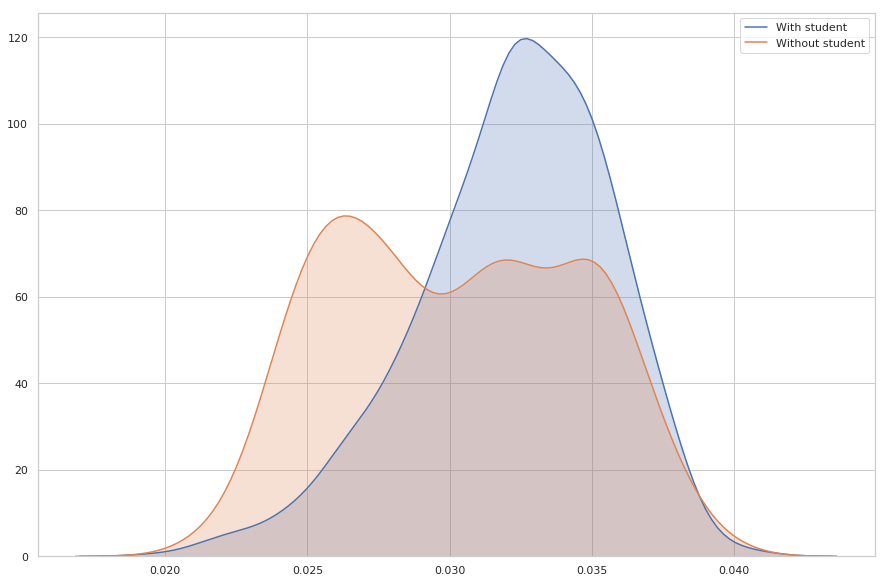

In [9]:
fig, ax = plt.subplots(figsize=(15,10))

sns.kdeplot(student_error, ax=ax, shade=True, label="With student")
sns.kdeplot(basic_error, ax=ax, shade=True, label="Without student")

It's not cut-and-dried (and I'm sure we could use e.g. K-L divergence to put numbers on this) but it looks like adding the `student` feature improves the fit.